##Exercise 0


a) Do some EDA with info, find out column names, shape of dataset, describe method to get summary descriptive statistics.

In [2]:
import pandas as pd

df = pd.read_csv("data/norway_new_car_sales_by_month.csv")

df

,Year,Month,Quantity,Quantity_YoY,Import,Import_YoY,Used,Used_YoY,Avg_CO2,Bensin_Co2,Diesel_Co2,Quantity_Diesel,Diesel_Share,Diesel_Share_LY,Quantity_Hybrid,Quantity_Electric,Import_Electric
0,2007,1,12685,5227,2276,257,NaN,NaN,152,155,152,10072,79.4,52.5,NaN,NaN,NaN
1,2007,2,9793,2448,1992,-89,NaN,NaN,156,159,155,7222,73.7,47.4,NaN,NaN,NaN
2,2007,3,11264,1445,2626,45,NaN,NaN,159,161,158,7965,70.7,48.1,NaN,NaN,NaN
3,2007,4,8854,504,2220,-130,NaN,NaN,160,165,158,6116,69.1,48.4,NaN,NaN,NaN
4,2007,5,12007,1592,2881,7,NaN,NaN,160,163,159,8519,71.0,49.1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2016,9,13854,1433,1526,-373,42780.0,236.0,88,98,128,3838,27.7,39.3,3991.0,2629.0,517.0
117,2016,10,11932,-1265,1365,-443,39797.0,-1611.0,91,98,127,3544,29.7,39.7,3209.0,1861.0,486.0
118,2016,11,13194,594,1305,-233,39721.0,2246.0,88,100,128,3892,29.5,39.7,3181.0,2567.0,502.0
119,2016,12,13602,524,1137,-96,31761.0,-631.0,98,106,136,4829,35.5,41.5,2597.0,2319.0,361.0


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,121.0,2011.545455,2.915476,2007.0,2009.0,2012.0,2014.0,2017.0
Month,121.0,6.454545,3.488075,1.0,3.0,6.0,9.0,12.0
Quantity,121.0,11134.297521,1752.046397,5353.0,10250.0,11385.0,12337.0,14207.0
Quantity_YoY,121.0,392.586777,1789.539953,-4548.0,-526.0,493.0,1445.0,5227.0
Import,121.0,2204.371901,573.127896,1048.0,1812.0,2263.0,2625.0,3768.0
Import_YoY,121.0,-135.049587,545.395787,-1810.0,-495.0,-114.0,162.0,1334.0
Used,61.0,36864.737705,4230.548664,24106.0,34212.0,37079.0,39797.0,44106.0
Used_YoY,49.0,973.122449,2728.915662,-6261.0,-392.0,855.0,2708.0,5896.0
Avg_CO2,121.0,129.520661,22.719338,84.0,110.0,132.0,151.0,162.0
Bensin_Co2,121.0,133.735537,17.094233,94.0,120.0,131.0,150.0,165.0


In [6]:
df.columns

Index(['Year', 'Month', 'Quantity', 'Quantity_YoY', 'Import', 'Import_YoY',
       'Used', 'Used_YoY', 'Avg_CO2', 'Bensin_Co2', 'Diesel_Co2',
       'Quantity_Diesel', 'Diesel_Share', 'Diesel_Share_LY', 'Quantity_Hybrid',
       'Quantity_Electric', 'Import_Electric'],
      dtype='object')

In [7]:
df.dtypes

Year                   int64
Month                  int64
Quantity               int64
Quantity_YoY           int64
Import                 int64
Import_YoY             int64
Used                 float64
Used_YoY             float64
Avg_CO2                int64
Bensin_Co2             int64
Diesel_Co2             int64
Quantity_Diesel        int64
Diesel_Share         float64
Diesel_Share_LY      float64
Quantity_Hybrid      float64
Quantity_Electric    float64
Import_Electric      float64
dtype: object

 b) Draw a line chart of quantity for each year. Is there a year that should be skipped?

In [23]:
import duckdb

df_quantitiy_year = duckdb.query("""
    SELECT 
    year, 
    SUM(quantity) as Quantity
    FROM df
    GROUP BY
        Year
    ORDER BY
        Quantity
    ASC   
""").df()
df_quantitiy_year



,Year,Quantity
0,2017,13055.0
1,2009,98675.0
2,2008,110617.0
3,2010,127754.0
4,2007,129195.0
5,2012,137967.0
6,2011,138345.0
7,2013,142151.0
8,2014,144202.0
9,2015,150686.0


<Axes: xlabel='Year'>

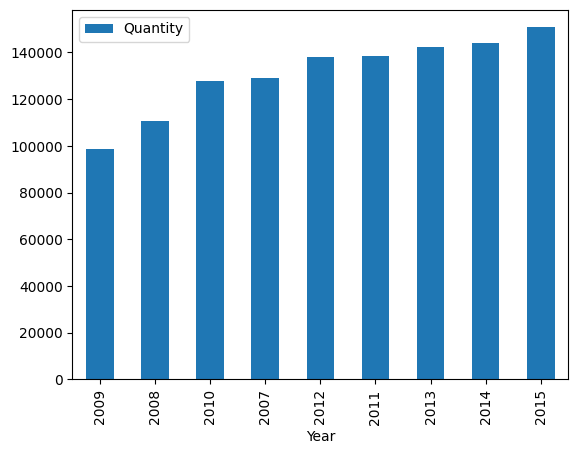

In [30]:
df_quantitiy_year.iloc[1:10].plot(kind= "bar", x = "Year", y = "Quantity")

# Excluded the year 2017 with abnormal data

c)  Draw a line chart of average CO2 emissions for same years that as in b)

In [41]:
df_emissions_year = duckdb.query("""
    SELECT 
    Year, 
    SUM(Avg_CO2) as Emissions
    FROM df
    GROUP BY
        Year
    ORDER BY
        Emissions
    ASC   
""").df()
df_emissions_year

,Year,Emissions
0,2017,84.0
1,2016,1120.0
2,2015,1197.0
3,2014,1325.0
4,2013,1476.0
5,2012,1559.0
6,2011,1608.0
7,2010,1688.0
8,2009,1811.0
9,2008,1896.0


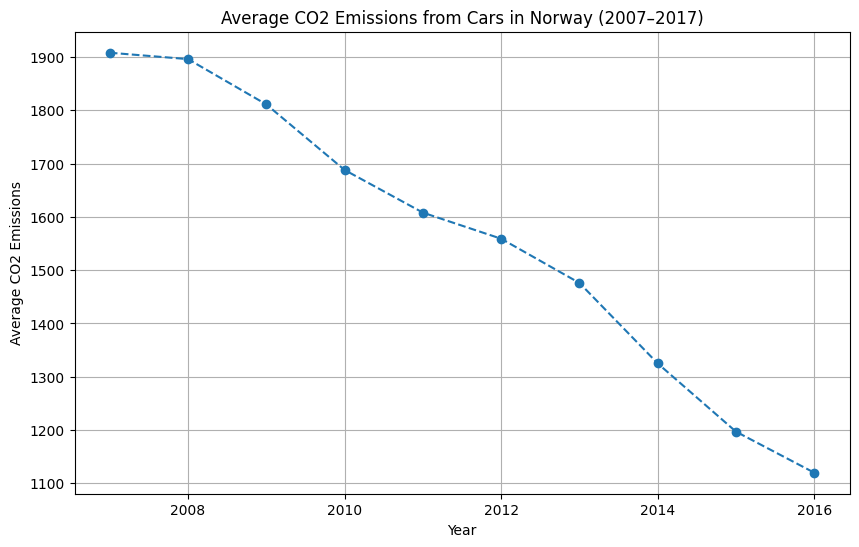

In [ ]:
import matplotlib.pyplot as plt

df_emissions_year2 = df_emissions_year2[df_emissions_year2["Year"] != 2017]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df_emissions_year2["Year"], df_emissions_year2["Emissions"], marker='o', linestyle='--') # marker for dots, linestyle for spaces in line

# Labels and title
plt.xlabel("Year")
plt.ylabel("Average CO2 Emissions")
plt.title("Average CO2 Emissions from Cars in Norway (2007–2017)")
plt.grid(True)
plt.show()
